# Machine Vision<br>Assignment 6 - Motion

## Personal details

* **Name(s):** `PUT YOUR NAME(S) HERE.`
* **Student ID(s):** `PUT YOUR STUDENT ID(S) HERE.`

## 1. Background subtraction - Introduction

In this assignment we use a background subtraction technique to detect moving objects in a video. We use a dynamic background that is continuously updated and threshold every frame of the video to detect new objects.

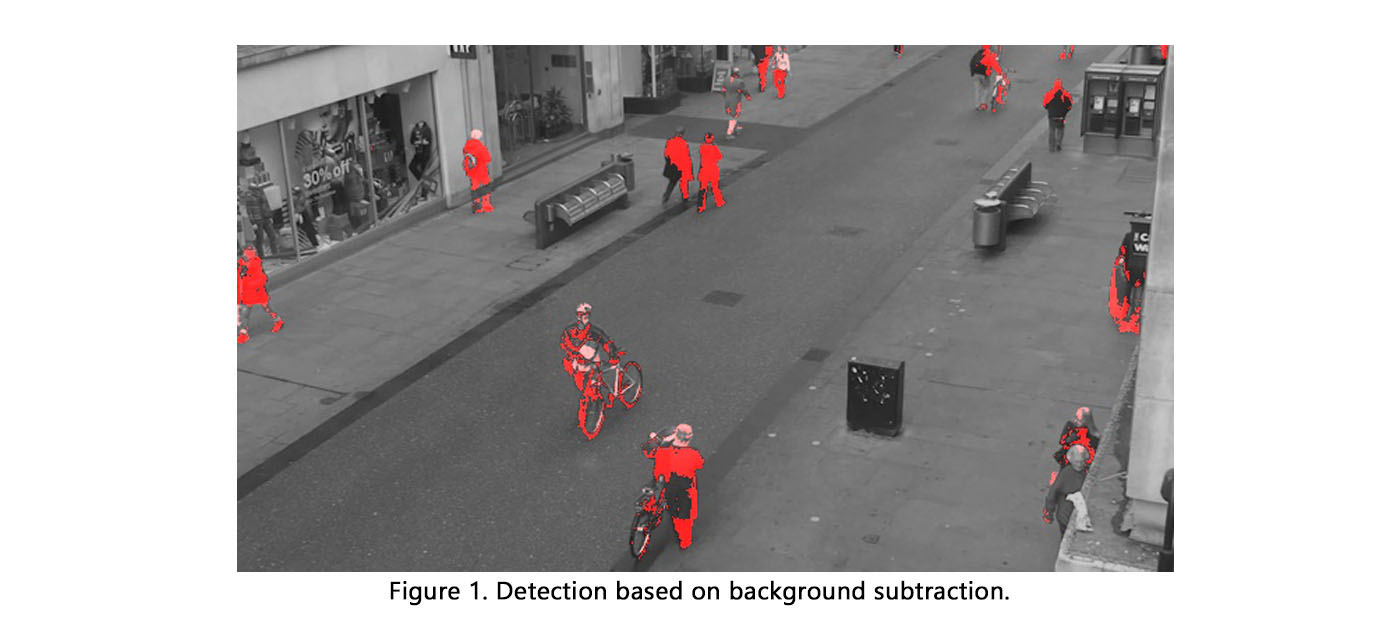

We will implement object detection through background subtraction as described in the lecture notes. We work with grayscale images. The background is a dynamic model where each pixel is described by a Gaussian (i.e. mean and variance). The background model for each pixel is updated after each frame according to the equations:

$$
\mu_{t+1} = \alpha \mu_t + (1-\alpha) z_{t+1} \qquad \qquad \qquad \qquad \qquad \qquad (1) \\
\sigma_{t+1}^2 = \alpha [\sigma_t^2 + (\mu_{t+1} - \mu_t)^2] + (1-\alpha)(z_{t+1} - \mu_{t+1})^2 \qquad \ \   (2)
$$

where $\alpha$ controls the rate of adaptation $(0 < \alpha < 1)$ and $z_{t+1}$ is the current pixel value. With this model we can decide whether a pixel contains an object of interest with the formula

$$
| z_t - \mu_t | > K \cdot \, \text{max}(\sigma_t, \sigma_{rcam}) \qquad \qquad (3)
$$

where $\sigma_{rcam}$ represents the standard deviation of the camera noise. Before we continue, let us display a few frames from the test video.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cap = cv2.VideoCapture('test.mp4')

# Read the first frame
ret, img0_color = cap.read()

# We work with grayscale images (range [0,1])
img0 = cv2.cvtColor(img0_color, cv2.COLOR_BGR2GRAY)/255
height, width = img0.shape

# Display and store a few frames
plt.figure(figsize=(15,10))
images = np.zeros((height,width,9), dtype=np.float32)

for i in range(9):
    
    cap.set(cv2.CAP_PROP_POS_FRAMES, 20*i)
    ret, img_color = cap.read()
    if ret == False:
        break
        
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)/255
    images[:,:,i] = img
    
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title('Frame %d' %(20*i))
    plt.axis('off')

cap.release()

## 2. Initialization

Next we initialize the mean and variance images. For the mean image, we compute the median of the frames. This will give us the background without the moving objects. The camera noise can be estimated from any two frames. Here we assume that $\sigma_{rcam} = 0.005$.

In [ ]:
sigma_cam = 0.005
mean_img = np.median(images, axis=2)
var_img = sigma_cam * np.ones_like(img0)

# The current state is stored in a dictionary
state_initial = {"alpha": 0.99,
                 "sigma_cam": sigma_cam,
                 "mean_img": mean_img,
                 "var_img": var_img,
                 "K" : 2.0}

# You can access the values by
alpha = state_initial["alpha"] # Or: state_initial.get("alpha")

# And you can change the values by
state_initial["alpha"] = 0.99

# Show the mean image
plt.figure(figsize=(8,5))
plt.imshow(mean_img, cmap='gray')
plt.title('Mean image (initial)')
plt.axis('off')

## 3. Update background model $\quad$ <font color=red>(1.00 points)</font>

Complete the following code cell. The function `updateBackgroundModel` should update the dynamic background based on the previous model. That is, you need to update the mean background image `state["mean_img"]` and the variance of the background `state["var_img"]` using Eq. (1) and Eq. (2).

In [ ]:
# INPUT   
# img   : The current grayscale image
# state : The current state (as define before)
#
# OUTPUT  
# state : Updated state, where state["mean_img"] and
#         state["var_img"] have been updated.
#
def updateBackgroundModel(img, state):
    
    # ---------- YOUR CODE STARTS HERE -----------
    

    
    
    
    # ---------- YOUR CODE ENDS HERE -----------

    return state


**Hints** 
- Note that Eq. (2) requires both $\mu_{t+1}$ and $\mu_t$. You get the updated mean background image $\mu_{t+1}$ from Eq. (1). 
- There is no need to use for-loops. Approximately 2-5 lines of code required.

## 4. Threshold frame $\quad$ <font color=red>(1.00 points)</font>

Next we will perform the background subtraction. Complete the following code cell. The function `thresholdFrame` should detect new objects in a frame given a background model. That is, you need to implement Eq. (3).

In [ ]:
# INPUT   
# img   : The current grayscale image
# state : The current state
#
# OUTPUT  
# thresh : Thresholded image
#
def thresholdFrame(img, state):
    
    # ---------- YOUR CODE STARTS HERE -----------
    
    # This line can be removed
    thresh = np.zeros(img.shape, dtype=np.bool)


    
    

    # ---------- YOUR CODE ENDS HERE -----------

    return thresh

**Hints** 
- Note that $\sigma_t$ in Eq. (3) represents the standard deviation (you need to take a square root).
- See the element-wise maximum operation __[`np.maximum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html)__
- Again, there is no need to use for-loops. Only a few lines of code required.

## 5. Testing

Once you have completed the two functions, perform background subtraction on the provided video using the following code. The code will process the first N frames and display the result for the last frame. The output should look like Figure 1.

In [ ]:
cap = cv2.VideoCapture('test.mp4')

N = 50
i = 0

state = state_initial.copy()

while i < N:

    ret, img_color = cap.read()
    if ret == False:
        break
        
    # Convert to grayscale
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)/255
    
    # Update
    state = updateBackgroundModel(img, state);
    
    i += 1
     
cap.release()

# Threshold
thresh = thresholdFrame(img, state);

# Overlay thresholded image on the frame
overlayed = np.stack((img,)*3, axis=-1)
red = img.copy()
red[thresh.astype(np.bool)] = 1
overlayed[:,:,0] = red

# Display
plt.figure(figsize=(10,7))
plt.imshow(overlayed)
plt.title('Detected motion')
plt.axis('off')

**5.1. Generate output video (optional)**

Uncomment the following code cell to generate an output video showing the detected regions.

In [ ]:
'''
cap = cv2.VideoCapture('test.mp4')

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), fps, (width,height))

N = 500
i = 0

state = state_initial.copy()

while i < N:

    ret, img_color = cap.read()
    if ret == False:
        break

    # Convert to grayscale
    img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)/255
    
    # Threshold
    thresh = thresholdFrame(img, state);
    
    # Update
    state = updateBackgroundModel(img, state);
    
    # Write output frame
    red = img_color[:,:,2]
    red[thresh.astype(np.bool)] = 255
    img_color[:,:,2] = red
    out.write(img_color)
    
    i += 1
     
cap.release()
out.release()
'''

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

# References
`LIST YOUR POSSIBLE REFERENCES HERE!`

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`MV_A6.ipynb` file) into **`MV_A6_[student number(s)].zip`** (e.g. `MV_A6_1234567.zip` if solo work or `MV_A6_1234567-7654321.zip` if pair work).
3. Send an email to janne.mustaniemi@oulu.fi with the subject line `MV_A6_[student number(s)]`. Remember to attach the .zip file.

**Deadline of the assignment 26.2.2020**